In [1]:
import numpy as np
import pandas as pd
import csv

In [2]:
data=pd.read_csv("train/train.csv")
data1=pd.read_csv("test/test.csv")

In [3]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


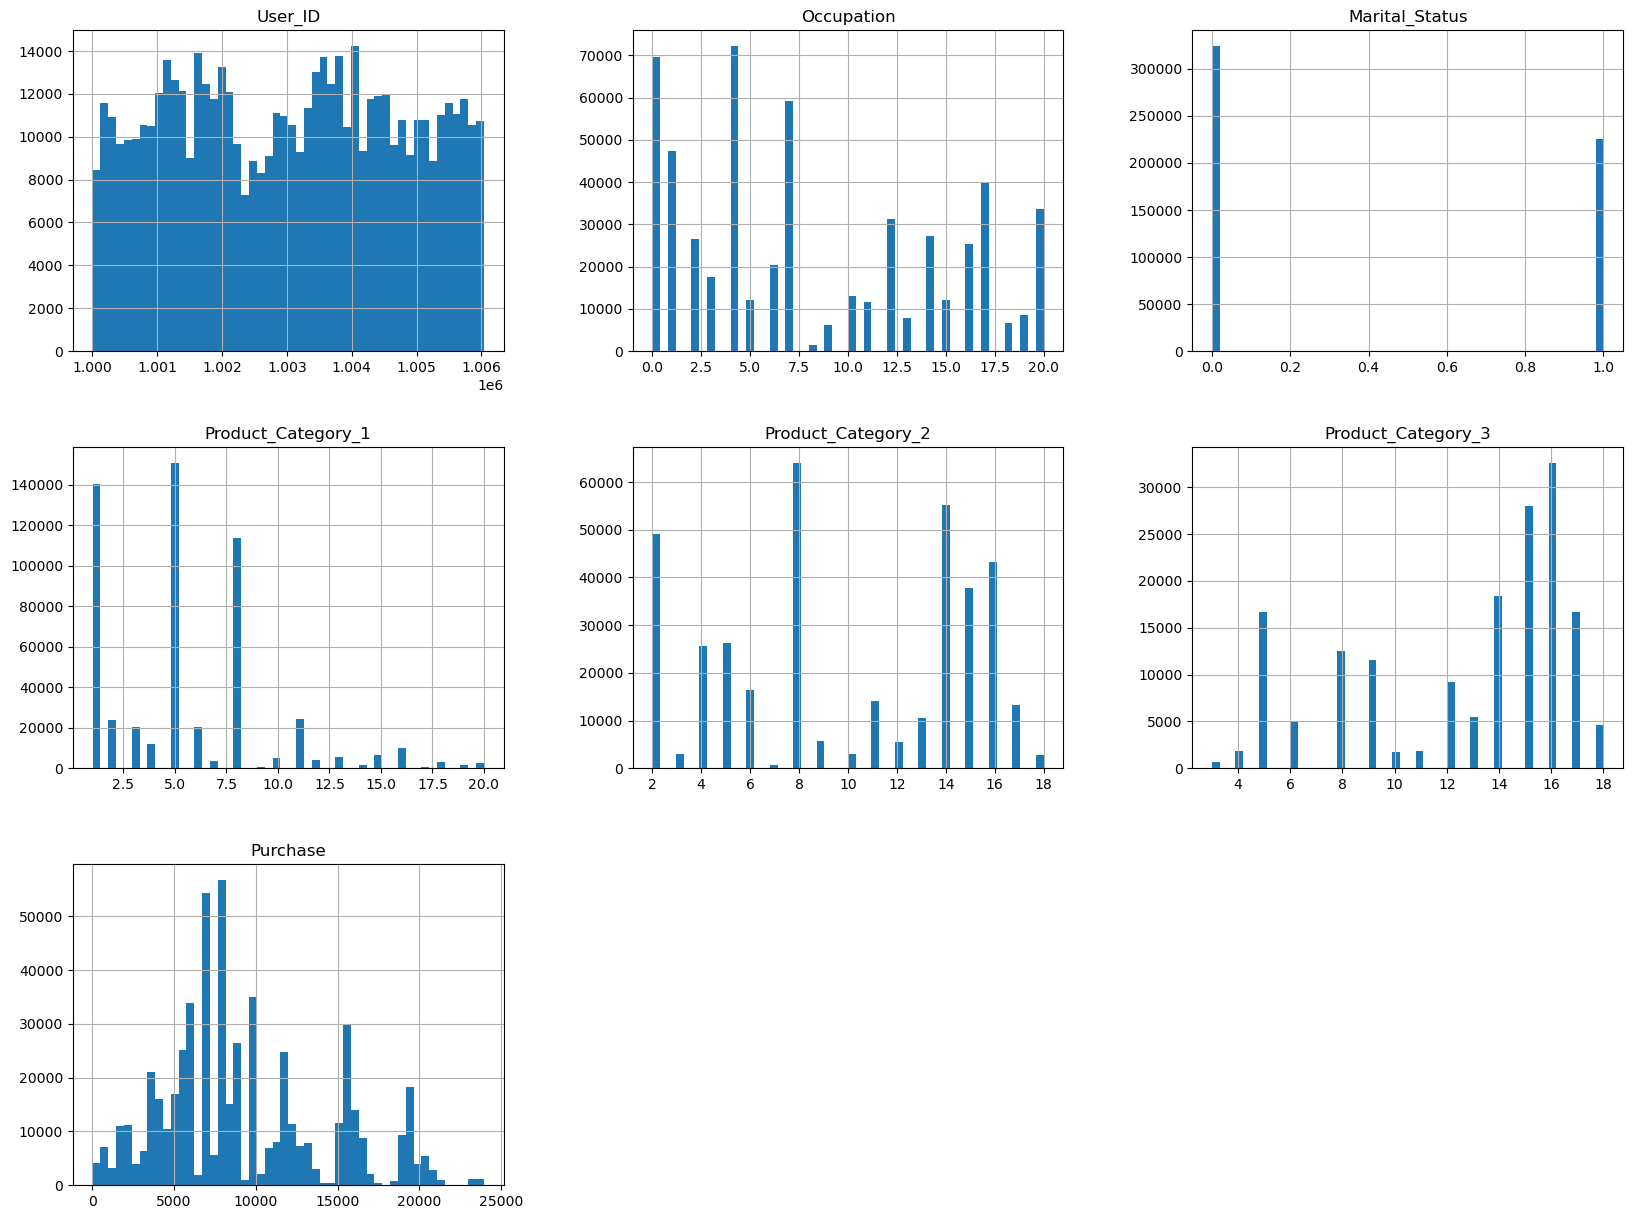

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=50,figsize=(20,15))
plt.show()

In [6]:
data=data.drop(['User_ID','Product_ID'],axis=1)

In [7]:
from sklearn.preprocessing import LabelEncoder
data.Gender=LabelEncoder().fit_transform(data.Gender)

In [8]:
data.City_Category=LabelEncoder().fit_transform(data.City_Category)

In [28]:
data.fillna(0)
data.dropna( inplace=True)

In [30]:
data['Age'].unique()

array([0, 4, 2, 5, 3, 1, 6])

In [32]:
data.Age=LabelEncoder().fit_transform(data.Age)

In [34]:
from sklearn.model_selection import train_test_split
x=data.drop('Purchase',axis=1)
y=data['Purchase']
trainx,testx,trainy,testy=train_test_split(x,y,test_size=0.2,random_state=0)

In [36]:
trainx.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
326108,1,1,19,2,4+,0,1,2.0,6.0
78472,1,2,2,1,3,0,1,5.0,18.0
504169,0,2,6,2,0,0,5,15.0,18.0
339142,0,2,7,2,2,0,2,5.0,14.0
59208,1,2,14,2,0,0,1,15.0,16.0


In [38]:
testx.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
53490,1,2,5,1,1,0,5,6.0,11.0
115274,1,2,0,0,4+,0,11,15.0,16.0
456169,1,3,7,1,4+,0,1,2.0,15.0
78393,0,4,16,0,1,1,1,5.0,18.0
232777,1,2,20,1,1,0,1,5.0,6.0


In [40]:
trainx.fillna(0)
testx.fillna(0)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
53490,1,2,5,1,1,0,5,6.0,11.0
115274,1,2,0,0,4+,0,11,15.0,16.0
456169,1,3,7,1,4+,0,1,2.0,15.0
78393,0,4,16,0,1,1,1,5.0,18.0
232777,1,2,20,1,1,0,1,5.0,6.0
...,...,...,...,...,...,...,...,...,...
494268,1,2,15,2,0,0,1,2.0,5.0
130705,1,2,4,0,3,0,2,8.0,14.0
108522,1,1,12,1,1,0,1,2.0,15.0
300679,1,2,16,1,1,0,1,11.0,15.0


In [42]:
trainx=trainx.replace('4+',int(4))
testx=testx.replace('4+',int(4))

In [44]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [46]:
regr = linear_model.LinearRegression()

In [48]:
reg = regr.fit(trainx, trainy)

In [54]:
y_pred = reg.predict(testx)

In [56]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mae = mean_absolute_error(testy,y_pred)
print(mae)
mse = mean_squared_error(testy,y_pred)
print(mse)
rmse = mean_squared_error(testy,y_pred,squared=False)
print(rmse)

3736.849596013848
21649585.23996502
4652.911479919323


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
